In [9]:
import pandas as pd
import numpy as np

milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [38]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [4]:
import matplotlib.pyplot as plt

In [7]:

y=milk['milk']

In [10]:
y=np.array(y)

In [12]:
len(y)

168

In [19]:
x = np.arange(1,169,1)

In [20]:
len(x)

168

In [21]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168])

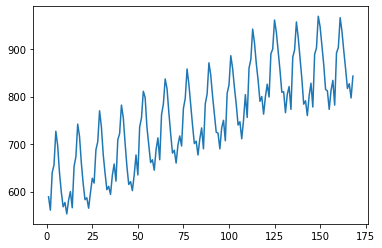

In [34]:
fig,ax=plt.subplots()
ax.plot(x,y)
plt.show()

In [35]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(y)

(-1.3038115874221219,
 0.6274267086030352,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [56]:
import calendar
m=0
y2=list()
year=1962
otv=0
for i in range(0,168):
    m+=1
    c,a=calendar.monthrange(year,m)
    if m==12:
        year+=1
        m=0
    otv+=y[i]/a
    y2.append(y[i]/a)

In [57]:
otv

4166.326661899464

In [50]:
len(y)

168

In [52]:
y[167]

843

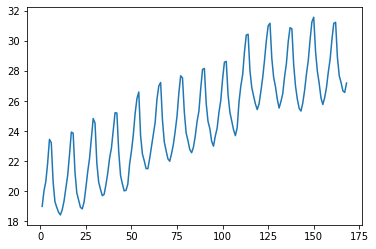

In [58]:
fig,ax=plt.subplots()
ax.plot(x,y2)
plt.show()

In [63]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)

<ipython-input-63-6f21274a4063>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff12 = milk.daily - milk.daily.shift(12)


In [61]:
milk['daily']=y2

In [62]:
milk

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,27.233333
1975-10-01,827,26.677419


In [64]:
milk.daily_diff12

month
1962-01-01         NaN
1962-02-01         NaN
1962-03-01         NaN
1962-04-01         NaN
1962-05-01         NaN
                ...   
1975-08-01   -0.290323
1975-09-01    0.066667
1975-10-01    0.483871
1975-11-01    0.800000
1975-12-01    0.967742
Name: daily, Length: 168, dtype: float64

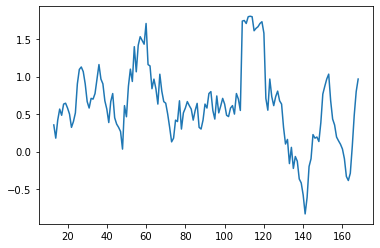

In [65]:
fig,ax=plt.subplots()
ax.plot(x,milk.daily_diff12)
plt.show()

In [69]:
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [70]:
milk['daily2']=milk.daily_diff12

In [73]:
milk.daily_diff1 = milk.daily2 - milk.daily2.shift(1)

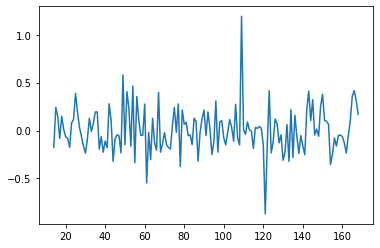

In [74]:
fig,ax=plt.subplots()
ax.plot(x,milk.daily_diff1)
plt.show()

In [75]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-5.4813263347969245,
 2.280845551803768e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

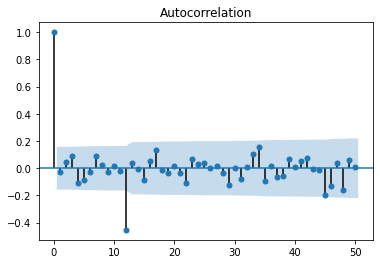

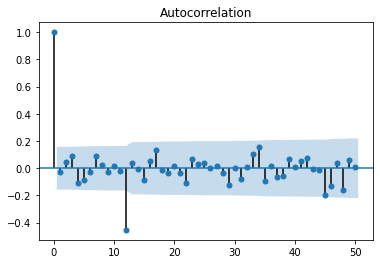

In [83]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff1.dropna().values.squeeze(), lags=50)

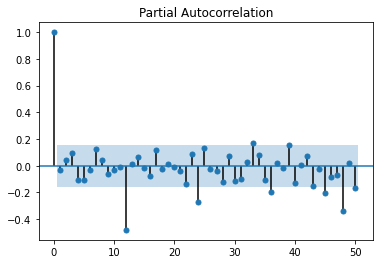

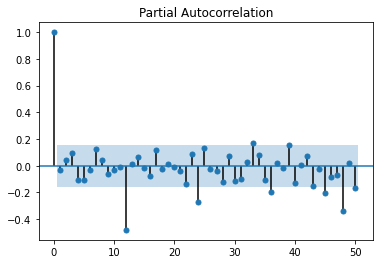

In [84]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff1.dropna().values.squeeze(), lags=50)